# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('Salary.csv')
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45,Male,3,Manager,15.0,NaN,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000.0,NaN,Hispanic,0
4,52,Male,2,Director,20.0,200000.0,USA,Asian,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6682 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6681 non-null   float64
 6   Country              6683 non-null   object 
 7   Race                 6676 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 470.1+ KB


# 1-Handling missing data

In [5]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

Age                    0
Gender                 0
Education Level        0
Job Title              2
Years of Experience    0
Salary                 3
Country                1
Race                   8
Senior                 0
dtype: int64

In [6]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean['Job Title'] = data['Job Title'].fillna(data['Job Title'].mode()[0])
data_clean.Salary = data.Salary.fillna(data.Salary.mean())
data_clean.Country  = data.Country.fillna(data.Country.mode()[0])
data_clean.Race = data.Race.fillna(data.Race.mode()[0])
data_clean.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000.000000,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000.000000,USA,Hispanic,0
2,45,Male,3,Manager,15.0,115297.584044,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000.000000,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000.000000,USA,Asian,0


In [7]:
data_clean.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

# 2-Encoding Categorical Data

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, 5].values
data_clean.drop("Salary",axis=1,inplace = True)
X = data_clean.iloc[:, 0:].values
X.shape

(6684, 8)

In [9]:
X[0]

array([32, 'Male', 1, 'Software Engineer', 5.0, 'UK', 'White', 0],
      dtype=object)

In [13]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,3,5,6])], remainder='passthrough')
X =ct.fit_transform(X).toarray()

In [14]:
print(X.shape)
print(y.shape)

(6684, 149)
(6684,)


# 3-Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

# 4-Splitting the dataset into training and test sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-MULTI Liner Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, Y_train)

LinearRegression()

In [18]:
import sklearn.metrics as sm
Y_pred = lr.predict(X_train)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_train, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_train, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 16546.45
Mean squared error train= 498109843.81
Median absolute error train= 11366.0
Explain variance score train= 0.82
R2 score train= 0.82


In [20]:
Y_pred = lr.predict(X_test)
print("Mean absolute error test =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error test=", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error test=", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 

Mean absolute error test = 1.1843727507877176e+17
Mean squared error test= 1.9271417019614415e+36
Median absolute error test= 11654.0


## Predicting the Test set results

In [21]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[132382. 120000.]
 [100830.  60000.]
 [ 34270.  33000.]
 ...
 [ 70558.  70000.]
 [ 53022.  55000.]
 [266142. 191790.]]


## Visualising the Multiple Linear Regression results

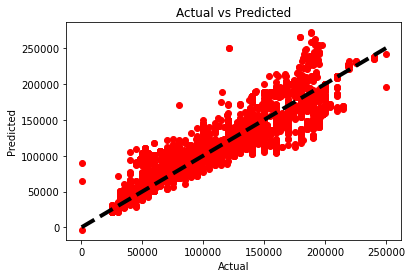

In [22]:
# Plotting actual vs predicted values
# Predict the target values
Y_pred = lr.predict(X_train)
plt.scatter(Y_train, Y_pred, color='red')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()